In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [4]:
#renaming the columns
df = df.rename(columns={'v1': 'target', 'v2': 'message'})

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.sample(10)

,target,message
2549,ham,Yup but not studying surfing lor. I'm in e laz...
3149,ham,Yo! Howz u? girls never rang after india. L
2679,spam,"New Tones This week include: 1)McFly-All Ab..,..."
5419,ham,I'm at bruce &amp; fowler now but I'm in my mo...
277,ham,"Awesome, I'll see you in a bit"
839,spam,Last chance 2 claim ur å£150 worth of discount...
1058,ham,Tell me they're female :V how're you throwing ...
5294,spam,XMAS iscoming & ur awarded either å£500 CD gif...
2561,ham,And maybe some pressies
3304,ham,Ee msg na poortiyagi odalebeku: Hanumanji 7 na...


In [8]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [9]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

np.int64(403)

In [11]:
df.drop_duplicates(keep = 'first', inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

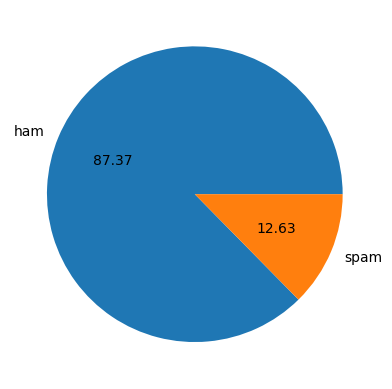

In [13]:
#Let's draw pie chart for spam and ham
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [14]:
import nltk
nltk.download('punkt') #Installing all the dependencies for tokenization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
#Let's create different features and see how many words are there in ham and spam messages and also number of characters and number of sentences
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [17]:
#Apply describe method on dataframe for differnt target values
# ham
df[df[ 'target'] == 0][[ 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df[ 'target'] == 1][[ 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [19]:
!pip install seaborn

/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/bin/pip: line 2: /Users/ankitpokhrel/Downloads/All projects/ML Projects/myenv/bin/python3.12: No such file or directory
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/bin/pip: line 2: exec: /Users/ankitpokhrel/Downloads/All projects/ML Projects/myenv/bin/python3.12: cannot execute: No such file or directory


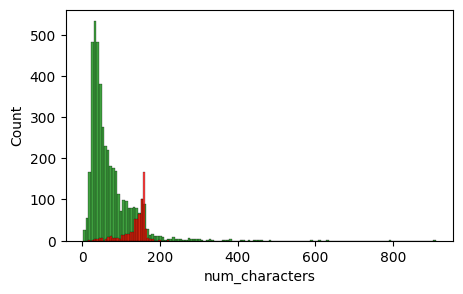

In [23]:
#Let's plot the histogram for the features we created above
import seaborn as sns
plt.figure(figsize=(5,3))
sns.histplot(df[df['target'] == 0]['num_characters'], color='green')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

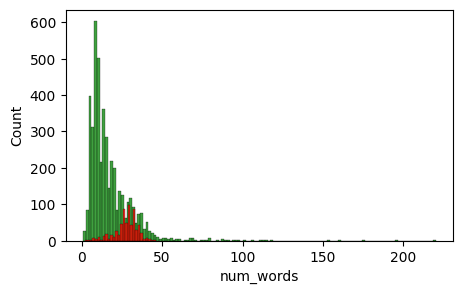

In [24]:
#Let's plot the histogram for the features we created above
import seaborn as sns
plt.figure(figsize=(5,3))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
plt.show()

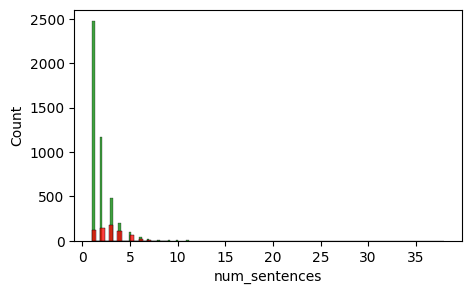

In [25]:
#Let's plot the histogram for the features we created above
import seaborn as sns
plt.figure(figsize=(5,3))
sns.histplot(df[df['target'] == 0]['num_sentences'], color='green')
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')
plt.show()

In [26]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'